# Laboratorio 4: Algoritmo de Montecarlo aplicado a las barajas de cartas
Integrantes: Juan Montoya, David Eslava,  Juan Sebastián Vargas

Use el código del algoritmo de Montecarlo desde [Github](https://github.com/gjhernandezp/algorithms/tree/master/Montercarlo)  


1.  a) Calcule la probabilidad de obtener una 21 según el número de cartas retiradas secuencialmente de una baraja Española de 48 cartas que ha sido barajada previamente.


### 1. a) Baraja Española
Primero importamos las librerias necesarias para programar

In [75]:
import matplotlib.pyplot as plt
import random as ra
import numpy as np

La baraja española está compuesta de 4 palos de 12 cartas. En donde la sota(J) toma el valor de 10, el caballo 11 y el rey 12 respectivamente
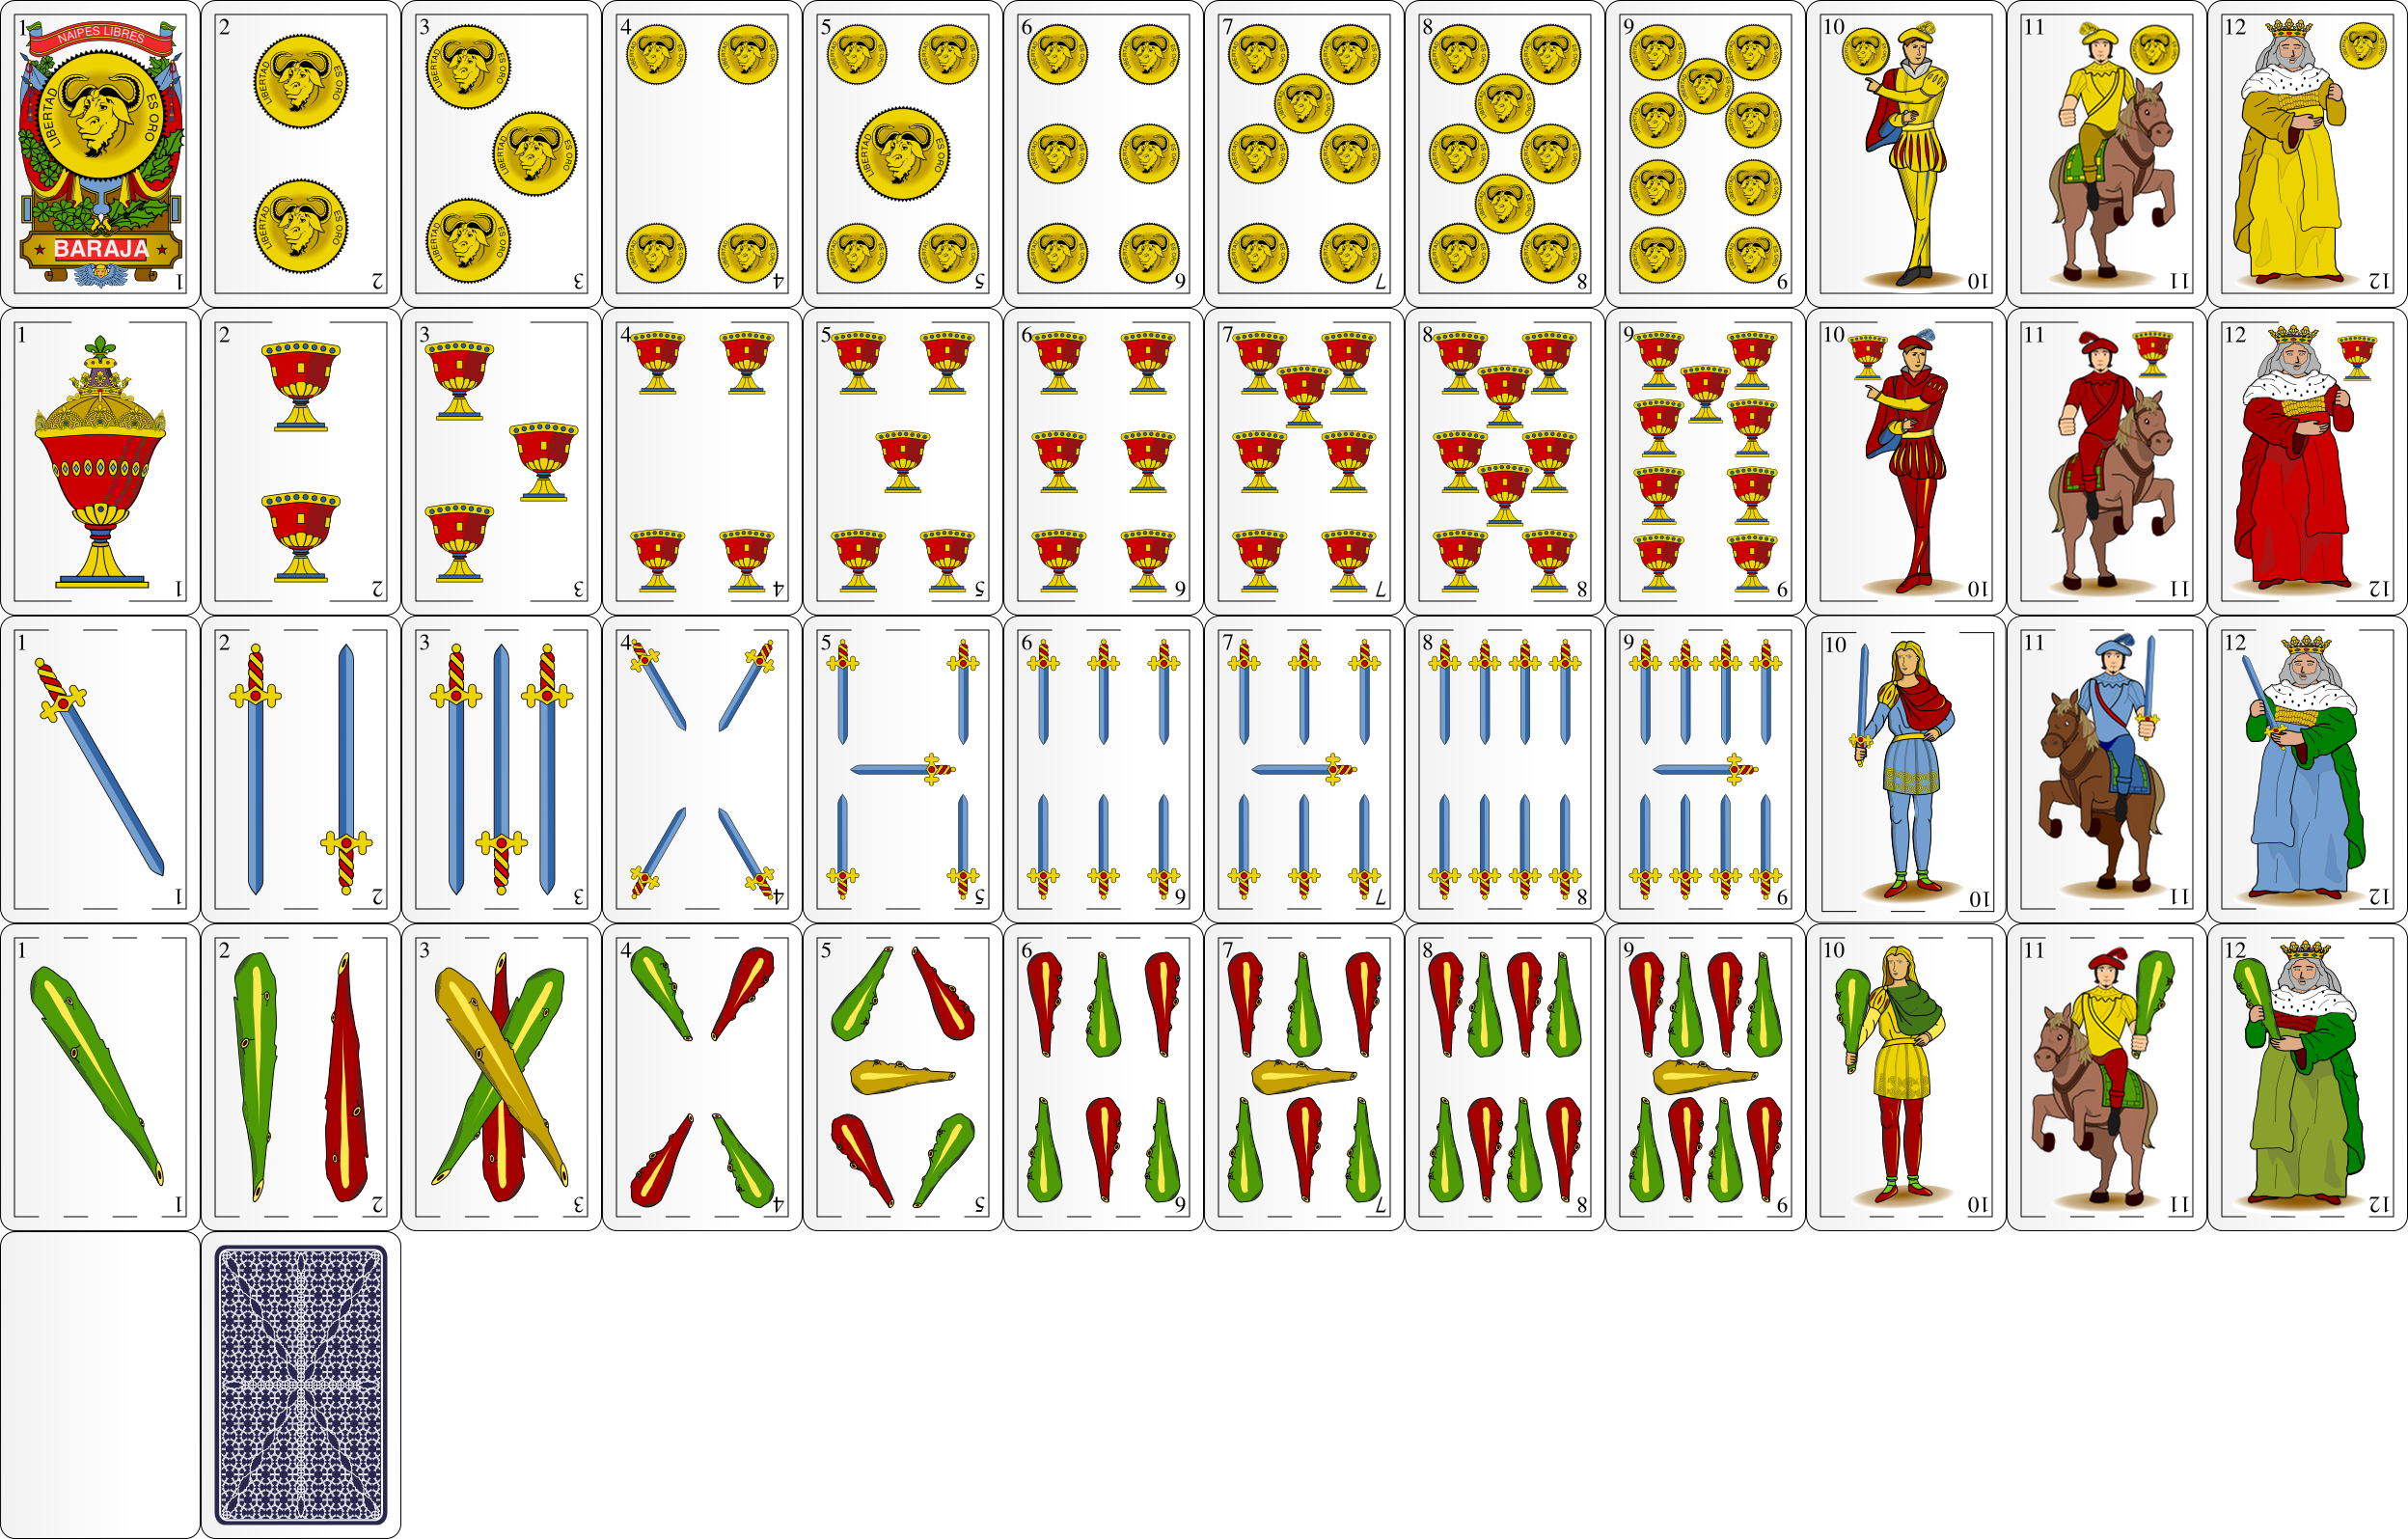

Tenemos 48 cartas distribuidas en 4 palos, en donde la función aleatoria debe garantizar que la distribución de cartas concuerde con la realidad, deben aparecer dentro de la distribución 4 cartas del mismo valor, ni más ni menos. Además se debe tener en cuenta que cada vez que se saca una carta, la probabilidad de obtener otra cambia.

In [76]:
n = 10000000 #iteraciones

# Función principal
**Ahora se define la función la cual simulará el juego de 21 y retornará el número de cartas necesarias para llegar a una 21 y el número de intentos exitosos**

* Datos de entrada: 
n: Número de simulaciones
; baraja: Lista con cartas
; cartas_en_mano: Lista de cartas con las que se emprezó

In [77]:
 def ventiuna(n, baraja, cartas_en_mano): # trae la baraja, el numero de cartas e intentos exitosos para cualquier tipo de baraja. 
  num_intentos = 0 # Guarda el número de éxitos. Es decir cada vez que hay 21
  num_cartas = [] # Guarda la distribución del número de cartas para llegar a 21
  for i in range(n):
    cartas_bar = baraja.copy() #Arreglo que copia la baraja seleccionada. Cartas_bar: Es el deck
    if (cartas_en_mano != 0): #se almacenan las cartas previamente en mano
      cartas_es = cartas_en_mano.copy()
      num_cartas_para_21 = len(cartas_es)
    else: # Si se tiene una mano vacia, se debe llevar el tercer atributo el valor de 0 y entra a este else
      cartas_es = []
      num_cartas_para_21 = 0 # Número de cartas para llegar a 21
    #Cartas_es: Cartas escogidas.
    while (sum(cartas_es) < 21): # Mientras la suma de cartas escogidas no sea igual o mayor a 21
      carta = ra.choice(cartas_bar) # 1. Se escoge una carta al azar
      cartas_es.append(carta) # 2. Guarda la carta escogida en la lista respectiva.
      cartas_bar.remove(carta) # 3. Se elimina del deck
      num_cartas_para_21 += 1 # 4. Se cuenta esta carta.
    if (sum(cartas_es) == 21): 
      num_intentos += 1 # Se cuenta un éxito en la probabilidad
      num_cartas.append(num_cartas_para_21) # Se guarda el número de cartas que se tomó para llegar a esa 21.
  return (num_cartas, num_intentos) # Devuelve: (La lista del número de cartas para llegar a 21)

# Funciones gráficas
Las siguientes funciones permitirán hacer histogramas y gráficos circulares, así como también brindar un resumen estadístico de cada simulación

In [78]:
def graficar_hist(datos, color): #función para hacer un histograma, trae como atributos los datos a graficar y el color que tendrá el gráfico
  plt.hist(datos, bins=15, facecolor=color) #bins se refiere a la distribución de las barras en el histograma, para dejarlo en modo automático de pone 'auto' aunque el valor más aproximado fue 15
  plt.show()

In [79]:
def graficar_pie(num_cartas, num_intentos):
  num_cartas= np.array(num_cartas) # se transforma el arreglo en un array de numpy para poder hacer la operación unique
  indices, valores = np.unique(num_cartas, return_counts=True) #guarda los índices y valores del arreglo al ordenarlo por tipo de dato y su frecuencia
  plt.pie(valores, autopct='%1.2f', startangle=90) #autopct hace que se muestre el dato porcentual en la gráfica
  plt.legend(indices, loc='best') #muestra la leyenda en el lugar adecuado
  plt.axis('equal') #posiciona la leyenda en un lugar adecuado
  plt.show() 
  for i in range(len(indices)):
    print('La probabilidad de obtener 21 al sacar %d cartas es del: %f porciento'%(indices[i],(valores[i]/num_intentos)*100)) #muestra la probabilidad de cada número de cartas

In [80]:
def mostrar_datos(simulacion, n):
  num_cartas = simulacion[0]
  num_intentos = simulacion[1]
  average = sum(num_cartas)
  print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, num_intentos))
  print('El promedio de número de cartas necesarias para llegar a 21 fue de: ' , round(average/num_intentos))
  print('El menor número de cartas necesarias para obtener 21 fue de %d repeticiones mientras que el máximo número de cartas fueron %d'%(min(num_cartas), max(num_cartas)))
  print("Probabilidad de obtener 21 es del: ", ((num_intentos/n) *100), '%')


Finalmente de realiza la simulación con $n=10000000$


# Simulación para Baraja Española

In [81]:
#Baraja
baraja_espanola=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
#Simulación
simulacion= ventiuna(n, baraja_espanola, 0)
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 1577861 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El menor número de cartas necesarias para obtener 21 fue de 2 repeticiones mientras que el máximo número de cartas fueron 9
Probabilidad de obtener 21 es del:  15.77861 %


Para poder visualizar mejor los resultados se puede gráficar los resultados.  
Para ello se realizarán 2 funciones para graficar un histograma y un diagrama circular para la probabilidad

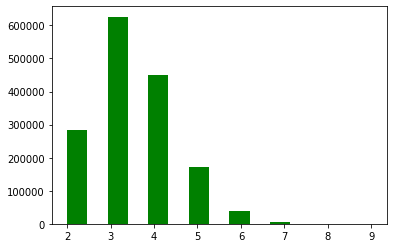

In [82]:
color='green'
graficar_hist(simulacion[0], color)

Con estos datos ahora se realiza la gráfica de probabilidad:

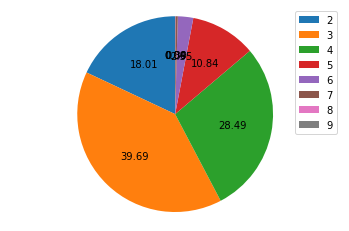

La probabilidad de obtener 21 al sacar 2 cartas es del: 18.007163 porciento
La probabilidad de obtener 21 al sacar 3 cartas es del: 39.693864 porciento
La probabilidad de obtener 21 al sacar 4 cartas es del: 28.485272 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 10.836252 porciento
La probabilidad de obtener 21 al sacar 6 cartas es del: 2.548133 porciento
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.391606 porciento
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.035998 porciento
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.001711 porciento


In [83]:
graficar_pie(simulacion[0], simulacion[1])

### 1. b) Baraja de Poker
Calcule la probabilidad del número de cartas utulizadas para sacar 21 de una baraja de poker de 52 cartas, grafique la distribución experimental de dicha probabilidad para 10000 intentos



La baraja de poker se compone por 4 palos de 13 cartas: 9 con valor numerico (2-10), y 3 figuras: As (valor 1 o 11), J o principe (11), Q o reina (12) y K o rey(13). Para este caso no se tendrá en cuenta los joker 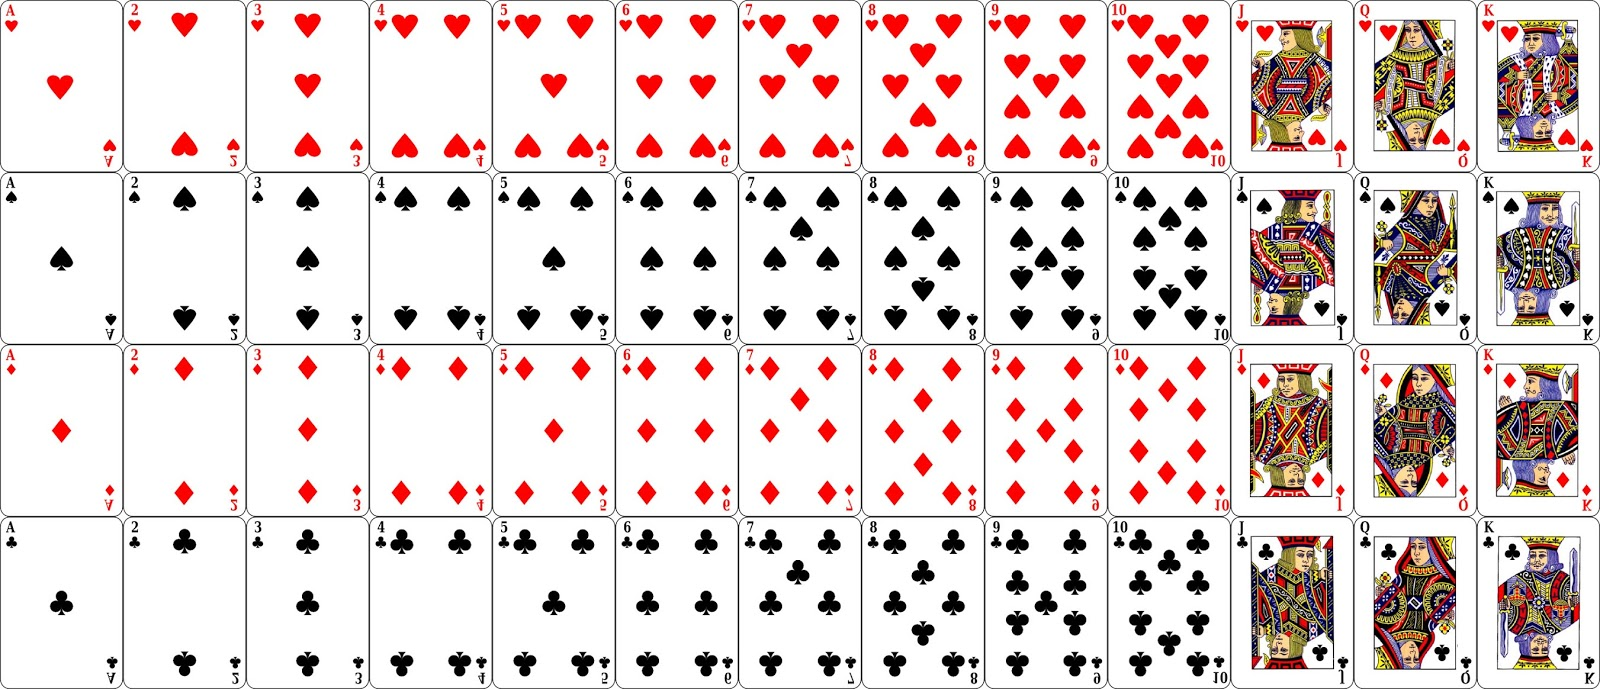


Al igual que en el primer caso, se debe garantizar que la baraja contenga el valor exacto de las cartas y se tenga en cuenta las probabilidades cuando una carta se retira, en este caso se debe tener en consideración cuando exista un As, puede tomar dos valores.  
En este caso cuando se tome un As, se le dará el valor máximo (11) y se examina si la baraja no excede la 21, y conservará este valor a menos de que se exceda dicho valor, en este caso pasará a tener el valor fijo de 1. Lo mismo aplicará si se tiene varios valores de As en la baraja

In [84]:
def veintiun_poker(n, poker):
  num_cartas=[]
  num_intentos=0
  for i in range(n):
    cartas_bar=poker.copy()
    cartas_es=[] #cartas en mano
    ases=[] #ases en mano, encaso de obtener varias aes, que tenian el valor de 11 deben ser convertidas a 1
    num_c=0
    while (sum(cartas_es)<21):
      carta=ra.choice(cartas_bar)
      if (carta =='A'): 
        if (sum(cartas_es)+11<21): #caso en el cual el valor máximo de A =11 no excede la 21
          ases.append('A')
          cartas_es.append(11)
        elif (sum(cartas_es)+1 <21): #caso de que a valga 1
          cartas_es.append(1)
        else:
          while (len(ases)>0 and sum(cartas_es)>21): #en caso de tener varias aes en la carta, se minimizará el valor hasta quitar el exceso de 21 o no queden Aes disponibles para cambiar
            ases.remove('A')
            cartas_es.remove(11)
            cartas_es.append(1)
      else:
        cartas_es.append(carta)
      cartas_bar.remove(carta)
      num_c+=1
    if (sum(cartas_es) == 21):
      num_intentos+=1
      num_cartas.append(num_c)
  return (num_cartas, num_intentos)

Definida la función se proceden a realizar las simulaciones:

In [85]:
baraja_poker=['A',2,3,4,5,6,7,8,9,10,11,12,13] #el as se guarda como un string, más adelante se explica el porqué
simulacion= veintiun_poker(n, baraja_poker)
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 1308631 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El menor número de cartas necesarias para obtener 21 fue de 2 repeticiones mientras que el máximo número de cartas fueron 6
Probabilidad de obtener 21 es del:  13.086310000000001 %


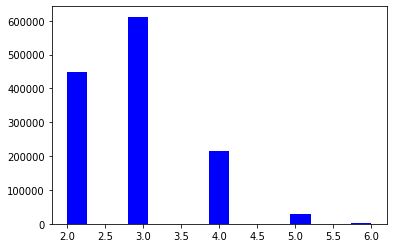

In [86]:
color='blue'
graficar_hist(simulacion[0], color)

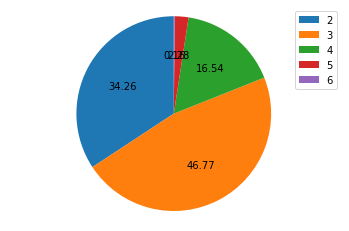

La probabilidad de obtener 21 al sacar 2 cartas es del: 34.255417 porciento
La probabilidad de obtener 21 al sacar 3 cartas es del: 46.773384 porciento
La probabilidad de obtener 21 al sacar 4 cartas es del: 16.535372 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 2.277953 porciento
La probabilidad de obtener 21 al sacar 6 cartas es del: 0.157875 porciento


In [87]:
graficar_pie(simulacion[0], simulacion[1])

## 2. Estime la probabilidad:
 Baraja: Española  [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] Poker [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9


In [88]:
n = 10000000

**Simulación Spanish Deck**

In [89]:
#Baraja
cartas_espanola=[1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] #arreglo que representa la baraja española
#Simulación
simulacion = ventiuna(n, cartas_espanola, 0)
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 1494784 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El menor número de cartas necesarias para obtener 21 fue de 3 repeticiones mientras que el máximo número de cartas fueron 9
Probabilidad de obtener 21 es del:  14.947840000000001 %


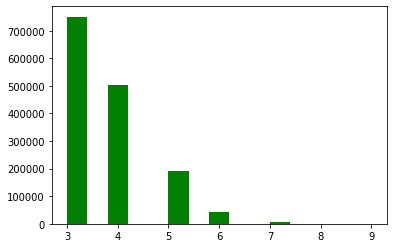

In [90]:
color='green'
graficar_hist(simulacion[0], color)

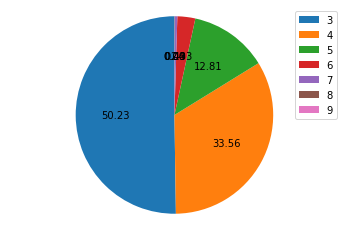

La probabilidad de obtener 21 al sacar 3 cartas es del: 50.234549 porciento
La probabilidad de obtener 21 al sacar 4 cartas es del: 33.558829 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 12.805864 porciento
La probabilidad de obtener 21 al sacar 6 cartas es del: 2.930055 porciento
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.426951 porciento
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.041143 porciento
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.002609 porciento


In [91]:
graficar_pie(simulacion[0], simulacion[1])

# b) Baraja Poker 

In [92]:
baraja_poker=['A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10,'A',2,3,4,5,6,7,8,9,10,10,10,10]
simulacion= veintiun_poker(n, baraja_poker)
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 1351876 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  3
El menor número de cartas necesarias para obtener 21 fue de 2 repeticiones mientras que el máximo número de cartas fueron 9
Probabilidad de obtener 21 es del:  13.518759999999999 %


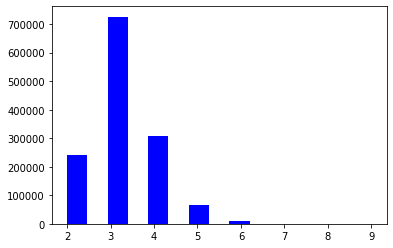

In [93]:
color='blue'
graficar_hist(simulacion[0], color)

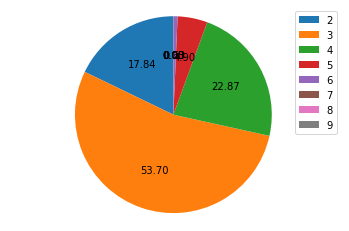

La probabilidad de obtener 21 al sacar 2 cartas es del: 17.843131 porciento
La probabilidad de obtener 21 al sacar 3 cartas es del: 53.701819 porciento
La probabilidad de obtener 21 al sacar 4 cartas es del: 22.866742 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 4.899784 porciento
La probabilidad de obtener 21 al sacar 6 cartas es del: 0.634822 porciento
La probabilidad de obtener 21 al sacar 7 cartas es del: 0.050892 porciento
La probabilidad de obtener 21 al sacar 8 cartas es del: 0.002737 porciento
La probabilidad de obtener 21 al sacar 9 cartas es del: 0.000074 porciento


In [94]:
graficar_pie(simulacion[0], simulacion[1])



# 3. Probabilidad con $\frac{n}{2}$ cartas  
Calcule la probabilidad de obtener una 21, con la baraja española y de poker, asumiendo que se está a la mitad de juego, se tiene la mitad de cartas de la baraja  y el jugador tiene las cartas $[7,7,5]$ . Usted seleccionará un carta de la baraja puesta arbitrariamente con la restricción e que debe tener máximo dos $7_s$ y tres $5_s$. Grafique la distribucón experimental del npumero de cartas requeridas para completar 21 en 10000 simulaciones de juego



Primero, se debe definir cuales serán las $\frac{n}{2}$ cartas que se usarán en la baraja en cada juego.  
Debido a la aleatoreidad de las cartas, se debe definir una función que genere la distribución aleatoria de la media baraja respetando la restricción indicada

Una vez tenemos la distribución aleatoria de la media baraja, se procede con la simulación de la 21 para la baraja española

In [95]:
n = 10000000

In [96]:
baraja_med = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

In [97]:
simulacion= ventiuna(n, baraja_med, [7,7,5])
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 868461 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El menor número de cartas necesarias para obtener 21 fue de 4 repeticiones mientras que el máximo número de cartas fueron 5
Probabilidad de obtener 21 es del:  8.68461 %


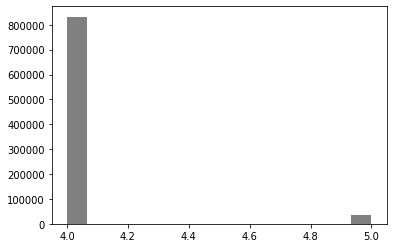

In [98]:
color='gray'
graficar_hist(simulacion[0], color)

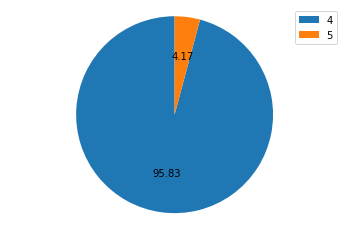

La probabilidad de obtener 21 al sacar 4 cartas es del: 95.831937 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 4.168063 porciento


In [99]:
graficar_pie(simulacion[0], simulacion[1])

Distribución de probabilidad para hot deck con baraja de poker

In [100]:
bar_med_pok=[1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]
simulacion= ventiuna(n, bar_med_pok, [7,7,5])
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 799359 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El menor número de cartas necesarias para obtener 21 fue de 4 repeticiones mientras que el máximo número de cartas fueron 5
Probabilidad de obtener 21 es del:  7.99359 %


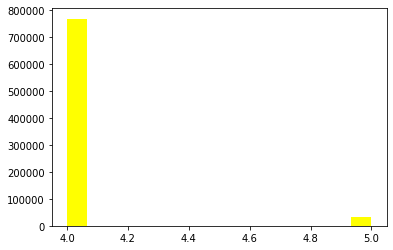

In [101]:
color='yellow'
graficar_hist(simulacion[0], color)

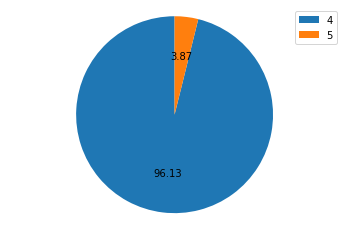

La probabilidad de obtener 21 al sacar 4 cartas es del: 96.130274 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 3.869726 porciento


In [102]:
graficar_pie(simulacion[0], simulacion[1])

#4. Analiticamente 
*  El hot deck se define como el arreglo con **mayor** probabilidad de sacar 21. En este caso se tomo [1, 1, 1, 1, 2, 2, 2, 2, n1, n2, n3, n4] 
*  El cold deck se define como el arreglo con **menor** probabilidad de sacar 21. En este caso se tomo [n1, n2, n3, n3, n4, n6, n7, n8, n9, n10, n11, n12] 
* Estos arreglos se deben a que cualquier carta diferente a 1 o 2 excederá 21 teniendo una suma previa de 19.
*  Donde $ni$ son números cuales quiera.
# Hot Deck Probabilidad.

**Analíticamente**
Dado [7,7,5] la probabilidad de obtener un 2, es:

*   Una carta: 2
*   Dos cartas: 1, 1
*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)}$ = ${4}\choose{2}$ / ${12}\choose{2} $ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} =  \frac{4}{12}  $ 

$P_{(2)}= \frac{4}{12} + \frac{6}{66} = 0.424242$ 
* Verificando con Monte Carlo:






## Cold Deck Probabilidad - SPANISH & POKER
**Analiticamente.**

*   Probabilidad de sacar 2 con dos cartas 1:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad de sacar 2 con una carta 2:
$ P_{(2)} = \frac{0}{12}$ 
*   Probabilidad total:
$ P_{(2)} = \frac{0}{12}$ 


# Simulación de Spanish Deck



*  **Hot** **deck**

In [103]:
n = 10000000

In [104]:
#Baraja
cartas_espanola=[1, 2, 3] * 4 #arreglo que representa la baraja española
#Simulación
cartas_en_mano = [7, 7 , 5]
simulacion = ventiuna(n, cartas_espanola, cartas_en_mano)
mostrar_datos(simulacion, n)

De las 10000000 reparticiones, se obtuvo 4242389 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El menor número de cartas necesarias para obtener 21 fue de 4 repeticiones mientras que el máximo número de cartas fueron 5
Probabilidad de obtener 21 es del:  42.42389 %


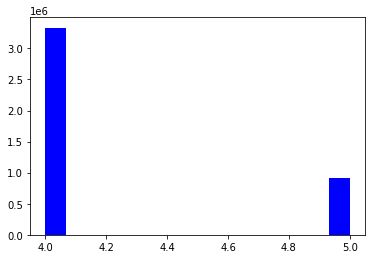

In [105]:
color='blue'
graficar_hist(simulacion[0],color)

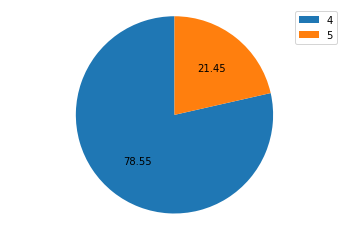

La probabilidad de obtener 21 al sacar 4 cartas es del: 78.549280 porciento
La probabilidad de obtener 21 al sacar 5 cartas es del: 21.450720 porciento


In [106]:
graficar_pie(simulacion[0], simulacion[1])

**Cold deck**

In [107]:
#Baraja
cartas_espanola = [10, 10, 10] * 4 #arreglo que representa la baraja española
#Simulación
cartas_en_mano = [7, 7 , 5]
simulacion = ventiuna(n, cartas_espanola, cartas_en_mano)
print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, simulacion[1]))
print("Probabilidad de obtener 21 es del: ", ((simulacion[1]/n) *100), '%')

De las 10000000 reparticiones, se obtuvo 0 veintiunas
Probabilidad de obtener 21 es del:  0.0 %


# 5. Ben va a las Vegas

1.   Juega cada fin de semana: 3 días
2.   Horas: 10
3.   Cada juego: 3 minutos. Por tanto nos da: 600 juegos
4.   Apuesta 1000 en hot decks
5.   Apuesta 10 en cold decks
6.   1 de 10 veces el tiene hot deck.
7.   9 de 10 veces el tiene cold deck.


# Analisis
1800 minutos / 3 minutos por juego = 600 juegos

In [108]:
def bet(n, hot_deck, cold_deck, cartas_en_mano): # trae la baraja, el numero de cartas e intentos exitosos para cualquier tipo de baraja. 
  num_intentos = 0 # Guarda el número de éxitos. Es decir cada vez que hay 21
  num_cartas = [] # Guarda la distribución del número de cartas para llegar a 21
  cartas_en_juego = cartas_en_mano.copy() #Se manipula solo la copia de cartas en mano, de manera que no se pierda la información de la original

  #Estas variables son para calcular las probabilidades de hot deck y cold deck independiemtemente
  num_hotdeck = 0 # Número de éxitos cuando es hot deck
  num_colddeck = 0 #N úmero de éxito cuando es cold deck
  ensayos_hotdeck = 0 # De los n * 600 ensayos totales, cuenta solo los ensayos para hot deck
  ensayos_colddeck = 0 # De los n * 600 ensayos totales, cuenta solo los ensayos para cold deck


  for i in range(n): #Simulación de 10000 veces
    probabilidad_deck = 0 # Cuenta cada cuanto debe haber un hot deck o un cold deck
    for j in range(600): #Este loop representa un fin de semana, en los que hace 600 juegos
      probabilidad_deck = ra.choice(range(11))  #Probabilidades de sacar un hot deck o un cold deck en cada juego. Se cuenta en tandas de 10
      if probabilidad_deck == 1:
        cartas_bar = hot_deck.copy()
        cartas_en_juego = cartas_en_mano.copy() #Si hay hot deck, hay cartas en mano
        ensayos_hotdeck += 1
      else:
        cartas_bar = cold_deck.copy() #Si es la primera vez, es cold deck, si es la segunda hasta la décima vez es cold deck.
        cartas_en_juego = 0 #Si hay cold deck no hay cartas en mano
        ensayos_colddeck += 1

      #Desde aquí comienza el algoritmo principal de montecarlo para calcular la probabilidad TOTAL incluidos sea que salgan cold decks o hot decks en cada iteración.
      if (cartas_en_juego != 0): #se almacenan las cartas previamente en mano
        cartas_es = cartas_en_juego.copy()
        num_cartas_para_21 = len(cartas_es)
      else: # Si se tiene una mano vacia, se debe llevar el tercer atributo el valor de 0 y entra a este else
        cartas_es = []
        num_cartas_para_21 = 0 # Número de cartas para llegar a 21
      #Cartas_es: Cartas escogidas.
      while (sum(cartas_es) < 21): # Mientras la suma de cartas escogidas no sea igual o mayor a 21
        carta = ra.choice(cartas_bar) # 1. Se escoge una carta al azar
        cartas_es.append(carta) # 2. Guarda la carta escogida en la lista respectiva.
        cartas_bar.remove(carta) # 3. Se elimina del deck
        num_cartas_para_21 += 1 # 4. Se cuenta esta carta.
      if (sum(cartas_es) == 21): 
        num_intentos += 1 # Se cuenta un éxito en la probabilidad
        num_cartas.append(num_cartas_para_21) # Se guarda el número de cartas que se tomó para llegar a esa 21.

        if probabilidad_deck == 1: #Acumular los éxitos de manera independiente para hot deck y cold deck
          num_hotdeck += 1
        else:
          num_colddeck += 1

  return (num_cartas, num_intentos, num_hotdeck/ensayos_hotdeck, num_colddeck/ensayos_colddeck) 
  # Devuelve: (La lista del número de cartas para llegar a 21 total; El número de éxitos total, Probabilidades ya caluladas hot deck; cold deck)

**Hot deck** & **Cold deck**

In [109]:
#Datos
n = 10000
cartas_en_mano = [7, 7, 5]
hotdeck = [1, 2, 3] * 4 # Hot deck
colddeck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10] * 4 #Complete deck
simulacion = bet(n, hotdeck, colddeck, cartas_en_mano)
num_cartas = simulacion[0]
num_intentos = simulacion[1]
average = sum(num_cartas)
print('De las %d reparticiones, se obtuvo %d veintiunas'%(n, num_intentos))
print('El promedio de número de cartas necesarias para llegar a 21 fue de: ' ,round(average/ num_intentos ) )
print('El menor número de cartas necesarias para obtener 21 fue de %d cartas mientras que el máximo número de cartas fueron %d'%(min(num_cartas), max(num_cartas)))
print("Probabilidad de obtener 21 es del: ", ((num_intentos / (n * 600) ) *100), '%')
print("Probabilidad de obtener 21 de Hot Deck : ", (simulacion[2] * 100), '%')
print("Probabilidad de obtener 21 de Cold Deck : ", (simulacion[3] * 100), '%')

De las 10000 reparticiones, se obtuvo 1048317 veintiunas
El promedio de número de cartas necesarias para llegar a 21 fue de:  4
El menor número de cartas necesarias para obtener 21 fue de 3 cartas mientras que el máximo número de cartas fueron 10
Probabilidad de obtener 21 es del:  17.47195 %
Probabilidad de obtener 21 de Hot Deck :  42.45300156890809 %
Probabilidad de obtener 21 de Cold Deck :  14.97631087609887 %


In [110]:
# Cálculo de dinero
money_earned_hotdeck = simulacion[2] * 1000
money_earned_colddeck = simulacion[3] * 10
money_lost_hotdeck = (1 - simulacion[2]) * -1000
money_lost_colddeck = (1 - simulacion[3]) * -10
print("Dinero ganado Hot deck y Cold deck: ", money_earned_hotdeck, money_earned_colddeck) # Money earned hot deck and cold deck
print("Dinero en perdido Hot deck y Cold deck: ", money_lost_hotdeck, money_lost_colddeck) # Money lost hot deck and cold deck
print("Hot deck: ", money_earned_hotdeck + money_lost_hotdeck)
print("Cold deck: ", money_earned_colddeck + money_lost_colddeck)
print("Total Neto con su respectiva probabilidad (por juego) ", ((money_earned_hotdeck + money_lost_hotdeck) * 0.1 + (money_earned_colddeck + money_lost_colddeck) * 0.9 ) )
print("Total en un fin de semana (600 juegos): ", ( (money_earned_hotdeck + money_lost_hotdeck) * 0.1 + (money_earned_colddeck + money_lost_colddeck) * 0.9) * 600 )

Dinero ganado Hot deck y Cold deck:  424.5300156890809 1.497631087609887
Dinero en perdido Hot deck y Cold deck:  -575.469984310919 -8.502368912390112
Hot deck:  -150.9399686218381
Cold deck:  -7.004737824780225
Total Neto con su respectiva probabilidad (por juego)  -21.398260904486012
Total en un fin de semana (600 juegos):  -12838.956542691607


**Resultados en un fin de semana** 


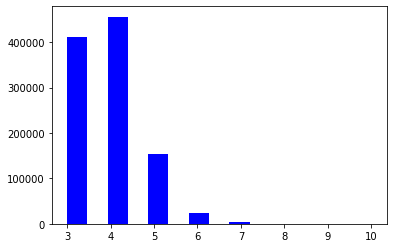

In [111]:
color='blue'
graficar_hist(simulacion[0],  color)

# 6. Crédito extra 



# 7. Calcular probabilidad
**Probabilidad de obtener un [7, 7, 5]**

**Poker**
* Probabilidad de sacar dos 7's:
* $ P_{(7)}$ = ${4}\choose{2}$ / ${52}\choose{2}$ 
* Probabilidad de sacar un 5
* $ P_{(5)}$ = $\frac{4}{52}$ 
* Total: $0.0814$

**Spanish**
* Probabilidad de sacar dos 7's:
* $ P_{(7)}$ = ${4}\choose{2}$ / ${48}\choose{2}$ 
* Probabilidad de sacar un 5
* $ P_{(5)}$ = $\frac{4}{48}$ 
* Total: $0.08865$

**Probabilidad de tener un hot deck de 12, 10, 8 cartas después de tener en mano [7, 7, 5]**
* Probailidad Hot Deck 8 cartas: 
    * Poker: $ P$ = $\frac{8}{49}$ 
    * Spanish: $ P$ = $\frac{8}{45}$ 
* Probailidad Hot Deck 10 cartas
    * Poker: $ P$ = $\frac{10}{49}$ 
    * Spanish: $ P$ = $\frac{10}{45}$ 
* Probailidad Hot Deck 12 cartas
    * Poker: $ P$ = $\frac{12}{49}$ 
    * Spanish: $ P$ = $\frac{12}{45}$ 

**TOTAL**
* Probailidad de 8 cartas: 
    * Poker: $0.081 + 0.1633 = 0.245$
    * Spanish: $0.088 + 0.177 = 0.266$
* Probailidad de 10 cartas: 
    * Poker: $0.081 + 0.204 = 0.0.2855$
    * Spanish: $0.088 + 0.222 = 0.3109$
* Probailidad de 12 cartas: 
    * Poker: $0.081 + 0.245 = 0.326$
    * Spanish: $0.088 + 0.266 = 0.355$